In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [ ]:
#AUDIT ACCURACY

In [ ]:
#Comparing Tickets Sold (Tickets Booked x Per Ticket Price) with the Sales Ammount per Transaction

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving newTT.csv to newTT.csv
Saving screenshows.csv to screenshows.csv
Saving booking.csv to booking.csv


In [ ]:
data1 = pd.read_csv('booking.csv',delimiter=";")
data2 = pd.read_csv('screenshows.csv',delimiter=";")
data3 = pd.read_csv('Dataset Movies - Transaction.csv')

In [ ]:
data1

,booking_id,created_at,user_id,screen_shows_id,tickets_booked
0,1,2022-01-02 09:48:51.0000,771,52,3
1,2,2021-11-07 19:40:13.0000,810,273,1
2,3,2021-06-05 08:12:41.0000,596,198,2
3,4,2020-01-21 22:55:05.0000,987,265,8
4,5,2022-06-27 15:35:42.0000,933,27,7
...,...,...,...,...,...
959,995,2022-05-25 03:09:05.0000,705,105,8
960,996,2022-02-24 10:15:28.0000,519,131,2
961,997,2021-01-31 23:53:41.0000,1,172,2
962,998,2022-05-14 23:22:27.0000,1000,268,9


In [ ]:
data2

,id,screen_id,movie_id,show_id,ticket_price,ticket_sold
0,1,7,53,28,100,172
1,2,78,10,31,150,189
2,3,166,54,28,130,156
3,4,183,39,14,140,134
4,5,228,40,22,200,408
...,...,...,...,...,...,...
268,281,151,1593,51,150,185
269,282,257,1597,10,100,393
270,283,163,1598,16,140,153
271,284,417,1633,34,170,137


In [ ]:
data3

,id,amount,booking_id
0,0085A403CB7746639BDA4AA13685D72B,750,214
1,009B662D20254FC68E1821830A638F5E,420,47
2,00BF506FCFDD474FBD290016F459F3EF,1400,353
3,01B9DA415860477E8673030277AE8A8A,1800,50
4,01DEEBF59D63447D88A347357BF04F69,450,279
...,...,...,...
959,FF2B1377BE044A65B65F6569F2A2F781,1360,185
960,FFA859E615FD48BEB17CCF9F09A12838,1400,978
961,FFD8302DB85E45A79EF3681B45FDE32E,1050,184
962,FFE193C8518C4882B37483EA6216BE27,1500,549


In [ ]:
data1['total'] = 0

In [ ]:
data1 = data1.sort_values('screen_shows_id')

In [ ]:
data1

,booking_id,created_at,user_id,screen_shows_id,tickets_booked,total
546,564,2021-06-22 06:57:40.0000,911,1,6,0
552,571,2022-01-20 00:01:40.0000,886,1,1,0
130,133,2022-05-20 20:45:24.0000,252,1,4,0
373,386,2021-09-11 01:34:26.0000,949,1,4,0
447,461,2020-05-20 02:09:03.0000,957,1,8,0
...,...,...,...,...,...,...
275,286,2020-08-15 08:28:17.0000,852,285,3,0
496,510,2022-03-30 01:58:57.0000,233,285,8,0
920,955,2022-06-10 22:16:52.0000,967,285,5,0
617,637,2021-11-12 05:33:26.0000,725,285,5,0


In [ ]:
for i in range(len(data2)):
  for j in range(len(data1)):
    if(data2.id[i]==data1.screen_shows_id[j]):
      data1.total[j] = data2.ticket_price[i]*data1.tickets_booked[j]

<ipython-input-13-ba7ec7a87f95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.total[j] = data2.ticket_price[i]*data1.tickets_booked[j]


In [ ]:
data1 = data1.sort_values('booking_id')

In [ ]:
data3 = data3.sort_values(by = 'booking_id')

In [ ]:
data1

,booking_id,created_at,user_id,screen_shows_id,tickets_booked,total
0,1,2022-01-02 09:48:51.0000,771,52,3,510
1,2,2021-11-07 19:40:13.0000,810,273,1,150
2,3,2021-06-05 08:12:41.0000,596,198,2,300
3,4,2020-01-21 22:55:05.0000,987,265,8,1200
4,5,2022-06-27 15:35:42.0000,933,27,7,700
...,...,...,...,...,...,...
959,995,2022-05-25 03:09:05.0000,705,105,8,1360
960,996,2022-02-24 10:15:28.0000,519,131,2,200
961,997,2021-01-31 23:53:41.0000,1,172,2,340
962,998,2022-05-14 23:22:27.0000,1000,268,9,1260


In [ ]:
data3

,id,amount,booking_id
96,19C284CC9A934729BB02D232A6FEB959,510,1
903,EE910F5715B34F189AF14AD6A300BEE3,150,2
750,C1B1D7D252724D8FA44540FE9567F1E6,300,3
391,661E0B2E908C4589B8D5682823762582,1200,4
72,139B4AE1961344F6A1BDDEC93DE60444,700,5
...,...,...,...
782,CA61D449AE3247DE896C4A4A7B6CA975,1360,995
590,97D3A1F793BB408787A7BFF3B974BFB7,200,996
75,146E83778A0E40909A4C06D5C2D6FBC2,340,997
441,729CC38E2E56466099589F45754F97CE,1260,998


In [ ]:
data4 = pd.DataFrame()

In [ ]:
data4 = pd.merge(data1, data3, on = 'booking_id')

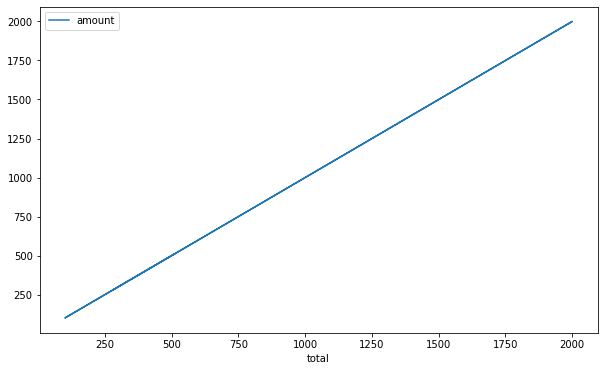

In [ ]:
data4.plot(x='total', y='amount', figsize=(10, 6))

In [ ]:
#Since y=x, the presales and postsales records match 

In [ ]:
#AUDIT COMPLETENESS

In [ ]:
#To check missing values in the data

In [ ]:
uploaded = files.upload()

Saving CleanedMovies.csv to CleanedMovies.csv
Saving IMDbMoviesIndia.csv to IMDbMoviesIndia.csv


In [ ]:
data5 = pd.read_csv('IMDbMoviesIndia.csv')
data6 = pd.read_csv('Dataset Movies - Movies.csv')

In [ ]:
data5

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data6

,Movie ID,Name,Year,Duration,Rating
0,32,Aaghaaz,2000,110,4.20
1,34,Aaj Ka Ravan,2000,120,4.30
2,108,Anjaane,2000,130,4.10
3,114,Anokha Moti,2000,140,6.90
4,124,Apradhi Kaun,2000,110,4.80
...,...,...,...,...,...
1640,707,Jawaani Jaaneman,2020,110,6.60
1641,895,Lootcase,2020,120,7.60
1642,897,Love Aaj Kal,2020,130,4.70
1643,589,Hawayein,2021,140,0.01


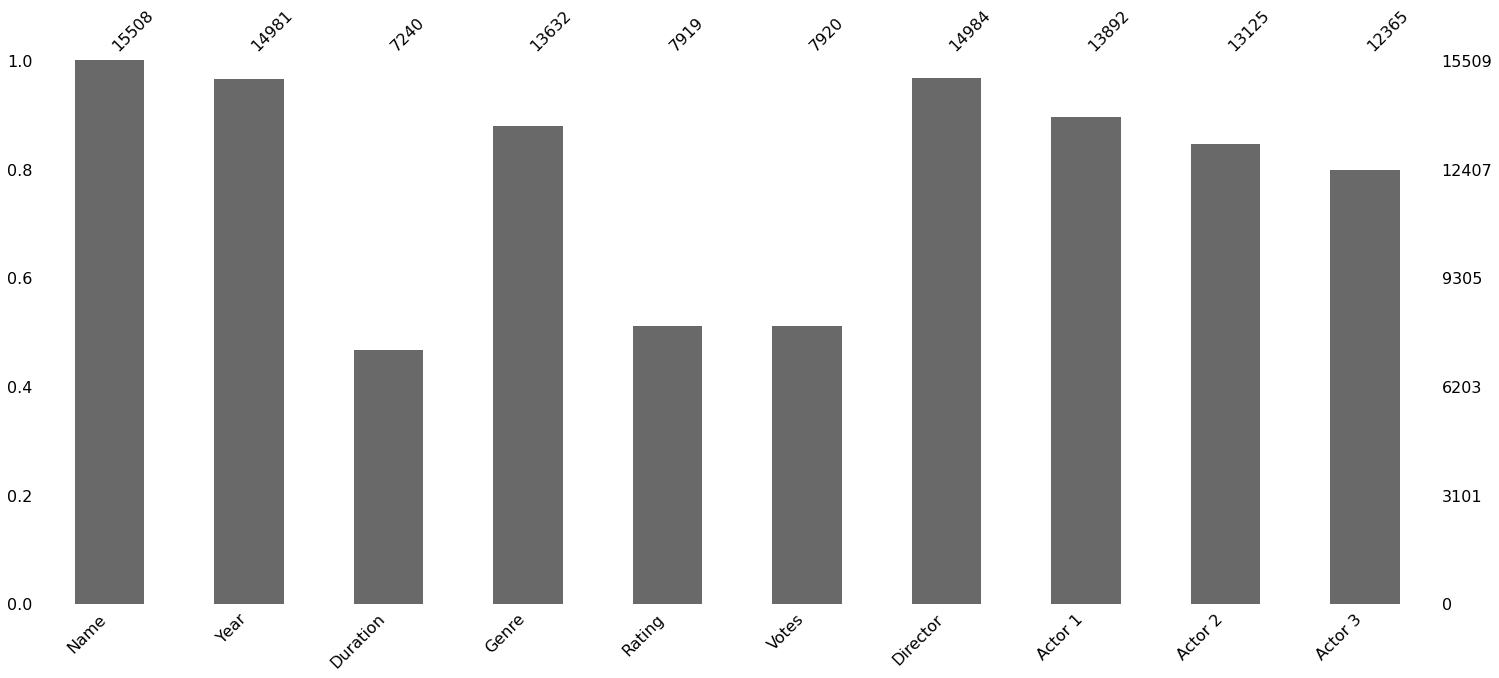

In [ ]:
msno.bar(data5)

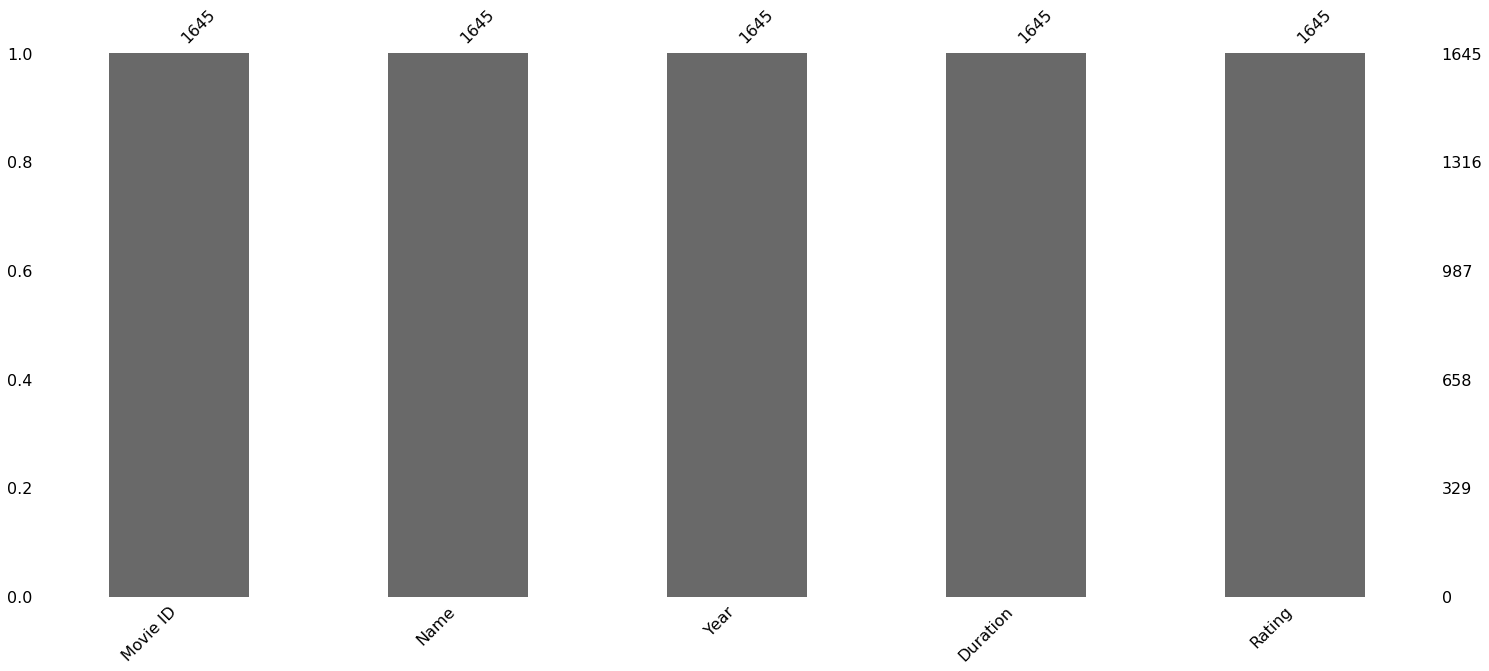

In [ ]:
msno.bar(data6)

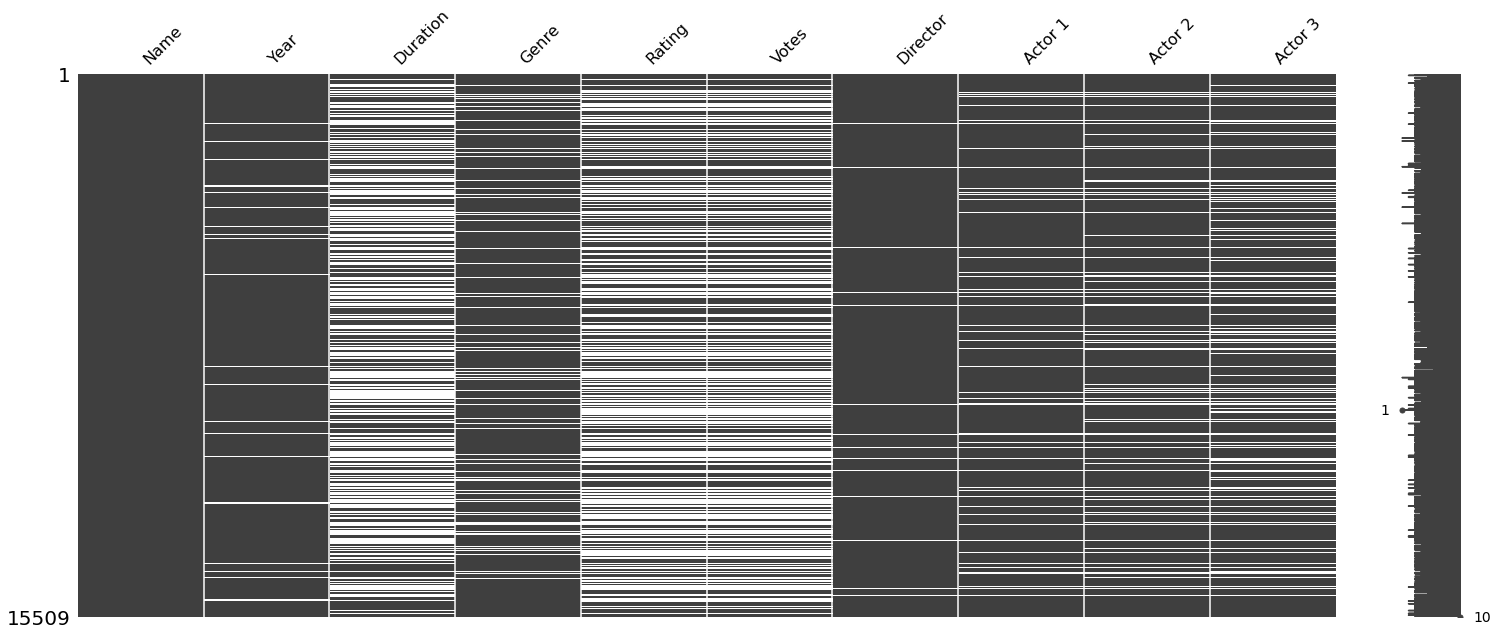

In [ ]:
msno.matrix(data5)

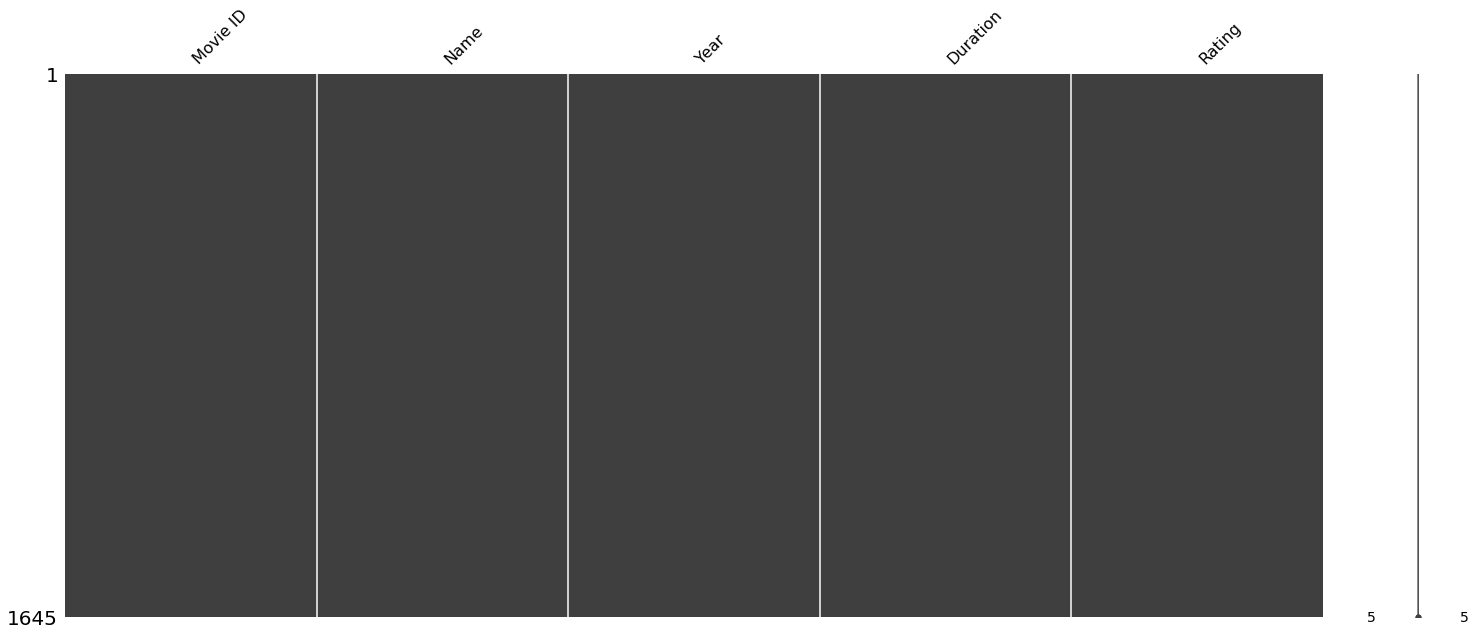

In [ ]:
msno.matrix(data6)

In [ ]:
#Data5 graph explains that the original data from source was uncleaned and there are many missing values in the columns - Duration, Year, and Rating
#Data6 graph explains how after cleaning the data all the missing values have been removed for the columns - Duration, Year, and Rating

In [ ]:
#AUDIT CONSISTENCY

In [ ]:
#MovieStars

In [ ]:
uploaded = files.upload()

Saving Consistency.csv to Consistency.csv


In [ ]:
data7 = pd.read_csv('Consistency.csv')

In [ ]:
data7

,no_of_actors,movie_id
0,3,1
1,3,2
2,3,3
3,3,4
4,3,5
...,...,...
1597,3,1641
1598,3,1642
1599,3,1643
1600,3,1644


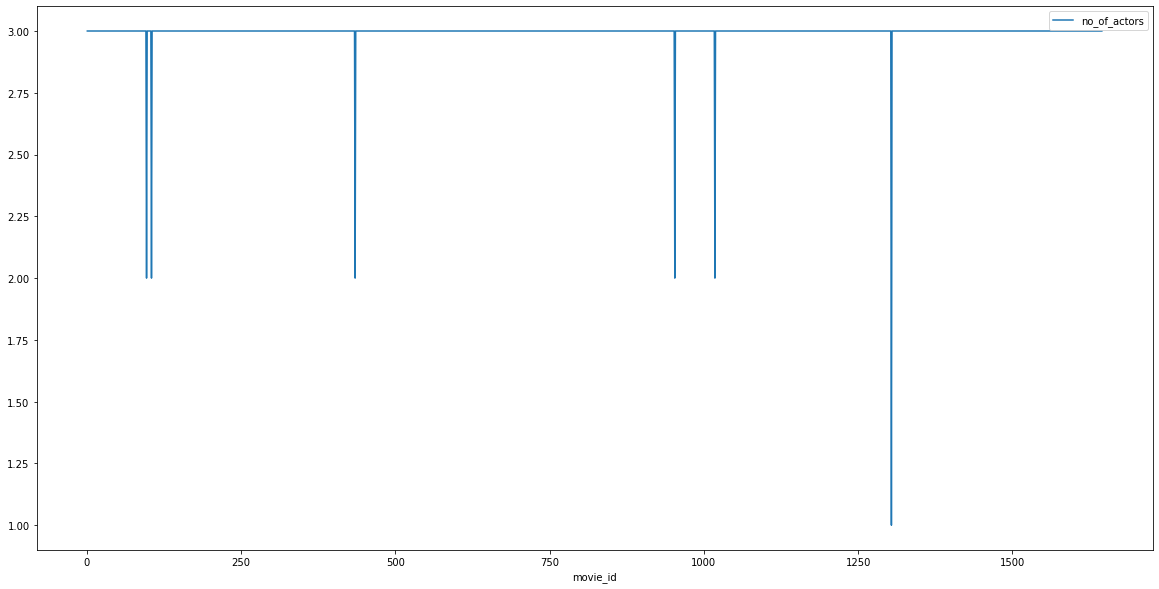

In [ ]:
data7.plot(x="movie_id", y="no_of_actors", kind="line", figsize=(20, 10))
plt.show()

In [ ]:
#The above graph explains that there exists atleast 1 star staring in every movie hence proves consistency in the data

In [ ]:
#TransactionID-BookingID

In [ ]:
#Every TransactionID has a BookingID proving Consistency in data

In [ ]:
uploaded = files.upload()

Saving Completeness - newTT.csv to Completeness - newTT.csv


In [ ]:
data8 = pd.read_csv('Dataset Movies - Transaction.csv')
data8 = data8.sort_values('booking_id')

In [ ]:
data8

,id,amount,booking_id
96,19C284CC9A934729BB02D232A6FEB959,510,1
903,EE910F5715B34F189AF14AD6A300BEE3,150,2
750,C1B1D7D252724D8FA44540FE9567F1E6,300,3
391,661E0B2E908C4589B8D5682823762582,1200,4
72,139B4AE1961344F6A1BDDEC93DE60444,700,5
...,...,...,...
782,CA61D449AE3247DE896C4A4A7B6CA975,1360,995
590,97D3A1F793BB408787A7BFF3B974BFB7,200,996
75,146E83778A0E40909A4C06D5C2D6FBC2,340,997
441,729CC38E2E56466099589F45754F97CE,1260,998


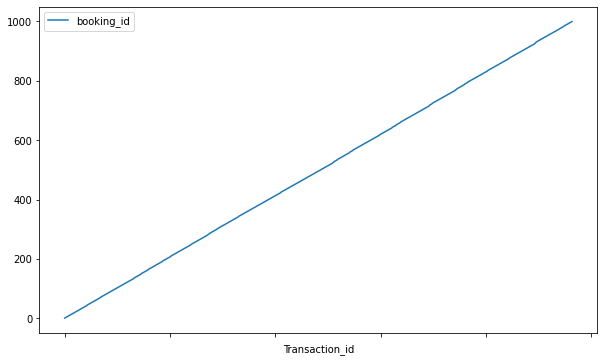

In [ ]:
data8.plot(x="id", y="booking_id", kind="line", figsize=(10, 6))
plt.xlabel('Transaction_id')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.show()